In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 설정
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ 라이브러리 로드 완료")


Matplotlib is building the font cache; this may take a moment.


✅ 라이브러리 로드 완료


In [2]:
# 데이터 로드
recipes = pd.read_csv('../data/RAW_recipes.csv')
interactions = pd.read_csv('../data/RAW_interactions.csv')

print(f"📊 데이터 로드 완료!")
print(f"레시피: {len(recipes):,}개")
print(f"리뷰: {len(interactions):,}개")
print(f"사용자: {interactions['user_id'].nunique():,}명")


📊 데이터 로드 완료!
레시피: 231,637개
리뷰: 1,132,367개
사용자: 226,570명


In [3]:
# 레시피 데이터 구조
print("=" * 50)
print("📖 RAW_recipes.csv 컬럼")
print("=" * 50)
for col in recipes.columns:
    print(f"  - {col}")

print("\n" + "=" * 50)
print("⭐ RAW_interactions.csv 컬럼")
print("=" * 50)
for col in interactions.columns:
    print(f"  - {col}")

print("\n" + "=" * 50)
print("📏 데이터 크기")
print("=" * 50)
print(f"레시피 메모리: {recipes.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"리뷰 메모리: {interactions.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

📖 RAW_recipes.csv 컬럼
  - name
  - id
  - minutes
  - contributor_id
  - submitted
  - tags
  - nutrition
  - n_steps
  - steps
  - description
  - ingredients
  - n_ingredients

⭐ RAW_interactions.csv 컬럼
  - user_id
  - recipe_id
  - date
  - rating
  - review

📏 데이터 크기
레시피 메모리: 358.0 MB
리뷰 메모리: 445.3 MB


In [4]:
# 평점 분포
print("=" * 50)
print("📊 평점 분포")
print("=" * 50)
rating_dist = interactions['rating'].value_counts().sort_index()
print(rating_dist)

print(f"\n평균 평점: {interactions['rating'].mean():.2f}")
print(f"중앙값: {interactions['rating'].median():.0f}")

# 비율로 보기
print("\n" + "=" * 50)
print("📈 평점 비율")
print("=" * 50)
for rating, count in rating_dist.items():
    pct = count / len(interactions) * 100
    bar = '█' * int(pct/2)
    print(f"{rating}점: {pct:>5.1f}% {bar}")



📊 평점 분포
rating
0     60847
1     12818
2     14123
3     40855
4    187360
5    816364
Name: count, dtype: int64

평균 평점: 4.41
중앙값: 5

📈 평점 비율
0점:   5.4% ██
1점:   1.1% 
2점:   1.2% 
3점:   3.6% █
4점:  16.5% ████████
5점:  72.1% ████████████████████████████████████


In [5]:
# 0점 리뷰 분석
zero_ratings = interactions[interactions['rating'] == 0]

print("=" * 50)
print("🔍 0점 리뷰 분석")
print("=" * 50)
print(f"0점 리뷰 개수: {len(zero_ratings):,}개")
print(f"0점 비율: {len(zero_ratings)/len(interactions)*100:.1f}%")

# 0점 리뷰 중 텍스트가 있는 것
zero_with_text = zero_ratings[zero_ratings['review'].notna()]
zero_without_text = zero_ratings[zero_ratings['review'].isna()]

print(f"\n리뷰 텍스트 있는 0점: {len(zero_with_text):,}개")
print(f"리뷰 텍스트 없는 0점: {len(zero_without_text):,}개")

# 샘플 확인
if len(zero_with_text) > 0:
    print("\n" + "=" * 50)
    print("📝 0점 리뷰 샘플 (텍스트 있는 경우)")
    print("=" * 50)
    for i, review in enumerate(zero_with_text['review'].head(3), 1):
        print(f"\n{i}. {review[:150]}...")


🔍 0점 리뷰 분석
0점 리뷰 개수: 60,847개
0점 비율: 5.4%

리뷰 텍스트 있는 0점: 60,847개
리뷰 텍스트 없는 0점: 0개

📝 0점 리뷰 샘플 (텍스트 있는 경우)

1. Just an observation, so I will not rate.  I followed this procedure with strawberries instead of raspberries.  Perhaps this is the reason it did not w...

2. Made my own buttermilk w/ vinegar and milk.  Used defrosted fresh skinless/boneless chicken fillets.  3 lbs.
This mix is extremely flavorful and its ...

3. This is a very good recipe.  We also want to cut back on the fat content in our diet . Very tasty dish!!!...


In [7]:
# 전처리 전략: 0점 제거
interactions_clean = interactions[interactions['rating'] > 0].copy()

print("=" * 50)
print("🧹 0점 제거 결과")
print("=" * 50)
print(f"제거 전: {len(interactions):,}개")
print(f"제거 후: {len(interactions_clean):,}개")
print(f"제거량: {len(interactions) - len(interactions_clean):,}개")
print(f"유지율: {len(interactions_clean)/len(interactions)*100:.1f}%")

# 새 평점 분포
print("\n" + "=" * 50)
print("새 평점 분포")
print("=" * 50)
new_dist = interactions_clean['rating'].value_counts().sort_index()
for rating, count in new_dist.items():
    pct = count / len(interactions_clean) * 100
    print(f"{rating}점: {count:>7,}개 ({pct:>5.1f}%)")



🧹 0점 제거 결과
제거 전: 1,132,367개
제거 후: 1,071,520개
제거량: 60,847개
유지율: 94.6%

새 평점 분포
1점:  12,818개 (  1.2%)
2점:  14,123개 (  1.3%)
3점:  40,855개 (  3.8%)
4점: 187,360개 ( 17.5%)
5점: 816,364개 ( 76.2%)


In [8]:
# 4-5점 = 긍정 (1)
# 1-3점 = 부정 (0)
interactions_clean['label'] = (interactions_clean['rating'] >= 4).astype(int)

print("=" * 50)
print("🏷️ 이진 분류 변환")
print("=" * 50)

label_dist = interactions_clean['label'].value_counts().sort_index()
print(f"부정 (0): {label_dist[0]:,}개 ({label_dist[0]/len(interactions_clean)*100:.1f}%)")
print(f"긍정 (1): {label_dist[1]:,}개 ({label_dist[1]/len(interactions_clean)*100:.1f}%)")

# 불균형 비율
ratio = label_dist[1] / label_dist[0]
print(f"\n불균형 비율: 긍정/부정 = {ratio:.1f}:1")

print("\n평점별 라벨 매핑:")
for rating in sorted(interactions_clean['rating'].unique()):
    label = 1 if rating >= 4 else 0
    label_name = "긍정" if label == 1 else "부정"
    print(f"  {rating}점 → {label} ({label_name})")

print("\n✅ 이진 분류 완료!")


🏷️ 이진 분류 변환
부정 (0): 67,796개 (6.3%)
긍정 (1): 1,003,724개 (93.7%)

불균형 비율: 긍정/부정 = 14.8:1

평점별 라벨 매핑:
  1점 → 0 (부정)
  2점 → 0 (부정)
  3점 → 0 (부정)
  4점 → 1 (긍정)
  5점 → 1 (긍정)

✅ 이진 분류 완료!


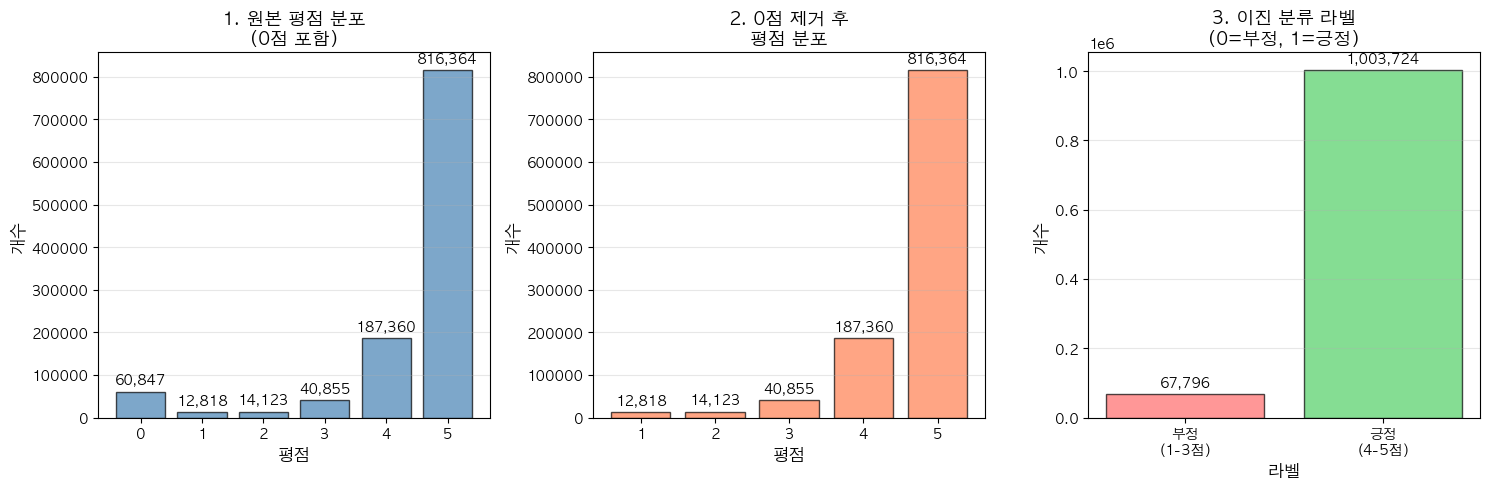

✅ 시각화 완료!


In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. 원본 평점 분포 (0점 포함)
rating_dist_original = interactions['rating'].value_counts().sort_index()
axes[0].bar(rating_dist_original.index, rating_dist_original.values, 
            color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('평점', fontsize=12)
axes[0].set_ylabel('개수', fontsize=12)
axes[0].set_title('1. 원본 평점 분포\n(0점 포함)', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(6))
axes[0].grid(axis='y', alpha=0.3)

# 2. 0점 제거 후 평점 분포
rating_dist_clean = interactions_clean['rating'].value_counts().sort_index()
axes[1].bar(rating_dist_clean.index, rating_dist_clean.values, 
            color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('평점', fontsize=12)
axes[1].set_ylabel('개수', fontsize=12)
axes[1].set_title('2. 0점 제거 후\n평점 분포', fontsize=13, fontweight='bold')
axes[1].set_xticks(range(1, 6))
axes[1].grid(axis='y', alpha=0.3)

# 3. 이진 분류 라벨
label_dist = interactions_clean['label'].value_counts().sort_index()
colors = ['#ff6b6b', '#51cf66']  # 부정=빨강, 긍정=초록
axes[2].bar(label_dist.index, label_dist.values, 
            color=colors, edgecolor='black', alpha=0.7)
axes[2].set_xlabel('라벨', fontsize=12)
axes[2].set_ylabel('개수', fontsize=12)
axes[2].set_title('3. 이진 분류 라벨\n(0=부정, 1=긍정)', fontsize=13, fontweight='bold')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['부정\n(1-3점)', '긍정\n(4-5점)'])
axes[2].grid(axis='y', alpha=0.3)

# 각 막대 위에 개수 표시
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

print("✅ 시각화 완료!")


In [10]:
# macOS용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
